In [6]:
#Installs
!pip install scanpy
!pip install anndata
!pip3 install igraph
!pip install celltypist
!pip install decoupler
!pip install fa2-modified
!pip install louvain
!pip install scvelo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 88.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [7]:
# Import Sc tools
import scanpy as sc
import anndata as ad
import numpy as np

In [3]:
! wget https://github.com/josoga2/sc/raw/refs/heads/main/bone_marrow.h5ad

--2025-12-06 09:23:55--  https://github.com/josoga2/sc/raw/refs/heads/main/bone_marrow.h5ad
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad [following]
--2025-12-06 09:23:56--  https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 354509549 (338M) [application/octet-stream]
Saving to: ‘bone_marrow.h5ad’

bone_marrow.h5ad    100%[===================>] 338.09M  24.5MB/s    in 15s     

2025-12-06 09:24:12 (22.2 MB/s) - ‘bone_marrow.h5ad’ saved [354509549/354

In [8]:
#Reading the dataset
bone_adata = sc.read_h5ad('bone_marrow.h5ad')
print(bone_adata)

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'


In [9]:
bone_adata.shape #dimensions of the dataset

(14783, 17374)

In [10]:
#14783 cells
#17374 genes
bone_adata.var.head() #overview of the rows describing the genes in the dataset

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding


In [11]:
bone_adata.obs.head()

,disease stage,treatment,timepoint,Dataset,sample,disease_original,disease_general,COVID-19 Condition,Lineage,Cell.group,...,is_primary_data,suspension_type,tissue_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep2,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Myeloid,CD14+ Monocyte,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,2P)e%zgsv_
Guo-AAACCTGAGAGGTTGC-7,remission,400 mg Tocilizumab at day 1,day 7,Guo et al._Nature Communication,Guo_P2-day7,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,78-year-old stage,Lv&N1yD6*0
Guo-AAACCTGAGATACACA-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,DZ>`^5OH2o
Guo-AAACCTGAGCGATTCT-1,severe,400 mg Tocilizumab at day 1,day 1,Guo et al._Nature Communication,Guo_P1-day1-rep1,COVID-19 Severe,COVID-19 Severe/Late stage/Vent,severe,Lymphoid_T/NK,CD8+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,J4$QmqEgvX
Guo-AAACCTGAGTGAAGAG-3,remission,400 mg Tocilizumab at day 1,day 5,Guo et al._Nature Communication,Guo_P1-day5-rep1,COVID-19 Mild/Remission,COVID-19 Remission,remission,Lymphoid_T/NK,CD4+ T cell,...,False,cell,tissue,10x 3' v2,COVID-19,male,blood,unknown,39-year-old stage,Y&7u#&E`-T


In [12]:
bone_adata.obs_keys()

/tmp/ipython-input-1200629322.py:1: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  bone_adata.obs_keys()


['disease stage',
 'treatment',
 'timepoint',
 'Dataset',
 'sample',
 'disease_original',
 'disease_general',
 'COVID-19 Condition',
 'Lineage',
 'Cell.group',
 'Cell.class_reannotated',
 'n_genes',
 'n_counts',
 'percent_mito',
 'tissue_original',
 'tissue_ontology_term_id',
 'disease_ontology_term_id',
 'donor_id',
 'development_stage_ontology_term_id',
 'assay_ontology_term_id',
 'cell_type_ontology_term_id',
 'self_reported_ethnicity_ontology_term_id',
 'sex_ontology_term_id',
 'is_primary_data',
 'suspension_type',
 'tissue_type',
 'assay',
 'disease',
 'sex',
 'tissue',
 'self_reported_ethnicity',
 'development_stage',
 'observation_joinid']

In [13]:
bone_adata.uns_keys()

/tmp/ipython-input-2162217540.py:1: FutureWarning: Use uns (e.g. `k in adata.uns` or `sorted(adata.uns)`) instead of AnnData.uns_keys, AnnData.uns_keys is deprecated and will be removed in the future.
  bone_adata.uns_keys()


['citation',
 'doi',
 'organism',
 'organism_ontology_term_id',
 'schema_reference',
 'schema_version',
 'title']

In [14]:
bone_adata.var_names_make_unique()
bone_adata.obs_names_make_unique()

In [15]:
bone_adata.var

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding
...,...,...,...,...,...,...,...
ENSG00000176946,559,False,THAP4,NCBITaxon:9606,gene,785,protein_coding
ENSG00000150456,289,False,EEF1AKMT1,NCBITaxon:9606,gene,875,protein_coding
ENSG00000284934,11,False,ENSG00000284934,NCBITaxon:9606,gene,560,protein_coding
ENSG00000261842,8,False,ENSG00000261842,NCBITaxon:9606,gene,2216,lncRNA


In [16]:
bone_adata.var_names

Index(['ENSG00000161920', 'ENSG00000122335', 'ENSG00000175548',
       'ENSG00000100330', 'ENSG00000176340', 'ENSG00000179846',
       'ENSG00000204860', 'ENSG00000172260', 'ENSG00000141424',
       'ENSG00000164512',
       ...
       'ENSG00000164114', 'ENSG00000151702', 'ENSG00000224578',
       'ENSG00000138756', 'ENSG00000111052', 'ENSG00000176946',
       'ENSG00000150456', 'ENSG00000284934', 'ENSG00000261842',
       'ENSG00000260456'],
      dtype='object', length=17374)

In [23]:
bone_adata.var['MT'] = bone_adata.var_names.str.startswith("MT-")
bone_adata.var['RIBO'] = bone_adata.var_names.str.startswith("RPS", "RPL")
bone_adata.var['HB'] = bone_adata.var_names.str.startswith("^HB[^(P)]")

In [24]:
sc.pp.calculate_qc_metrics(
    bone_adata, qc_vars=["MT", 'RIBO', 'HB'], inplace=True, log1p=True
)

In [25]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5,4)  # Adjust figure size
plt.rcParams["axes.grid"] = True  # Add grid to plots
plt.rcParams["axes.edgecolor"] = "black" # Set plot border color
plt.rcParams["axes.linewidth"] = 1.5 # Set plot border width
plt.rcParams["axes.facecolor"] = "white" # Set background color
plt.rcParams["axes.labelcolor"] = "black" # Set label color
plt.rcParams["xtick.color"] = "black" # Set x-axis tick color
plt.rcParams["ytick.color"] = "black" # Set y-axis tick color
plt.rcParams["text.color"] = "black" # Set text color

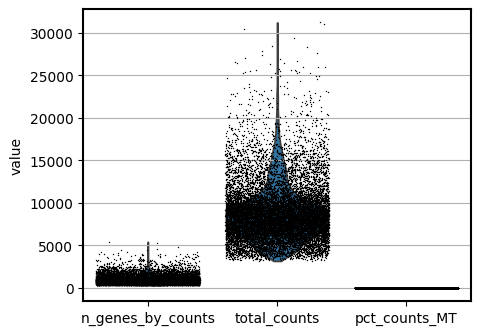

In [26]:
sc.pl.violin(
    bone_adata,
    ["n_genes_by_counts", 'total_counts', 'pct_counts_MT'],
    jitter=0.4,
    multi_panel=False,
)

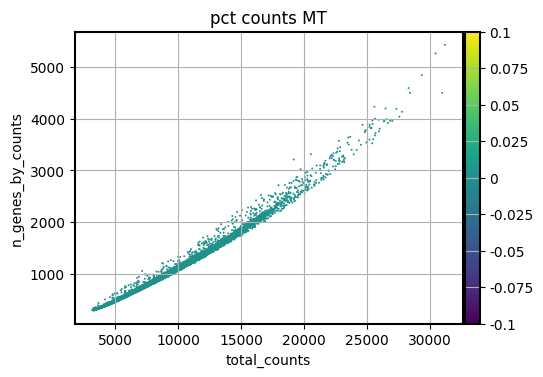

In [27]:
sc.pl.scatter(bone_adata, "total_counts", "n_genes_by_counts", color="pct_counts_MT")

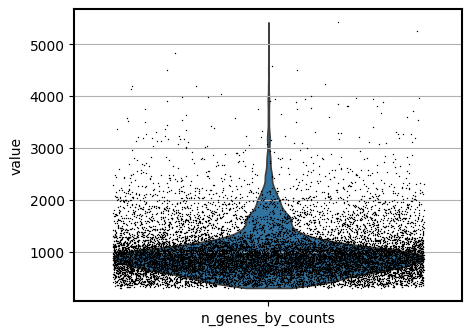

In [28]:
#The number of genes expressed in each cell
sc.pl.violin(
    bone_adata,
    ["n_genes_by_counts"],
    jitter=0.4,
    multi_panel=False,
)

In [34]:
#Normalization
bone_adata.layers["counts"] = bone_adata.X.copy()
sc.pp.normalize_total(bone_adata)
sc.pp.log1p(bone_adata)

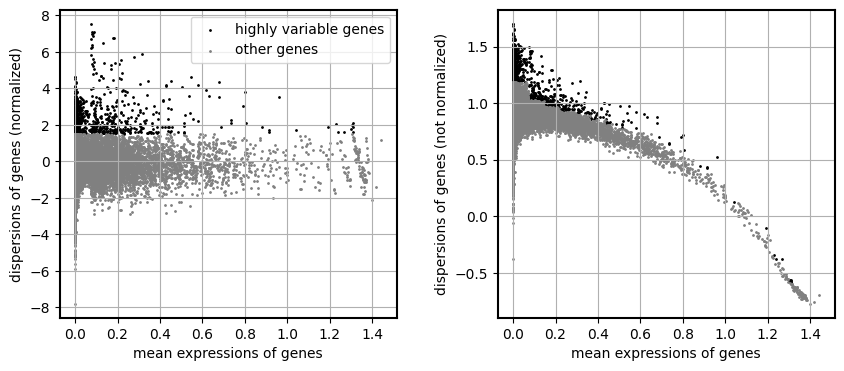

In [35]:
# Feature Selection
sc.pp.highly_variable_genes(bone_adata, n_top_genes=1000)
sc.pl.highly_variable_genes(bone_adata) #plot of highly variable genes

In [36]:
#Dimensionality Reduction
sc.tl.pca(bone_adata)

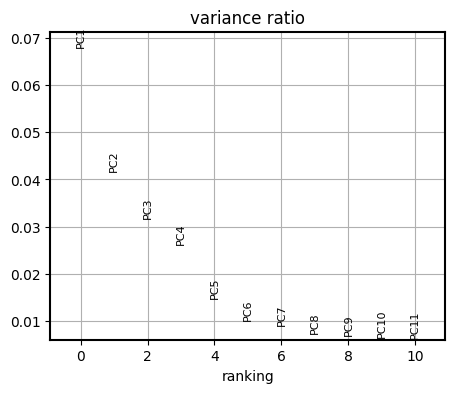

In [37]:
sc.pl.pca_variance_ratio(bone_adata, n_pcs=10, log=False)

In [38]:
#Checking the Nearest Neighbor
sc.pp.neighbors(bone_adata)
sc.tl.umap(bone_adata)

In [39]:
bone_adata

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO',

In [46]:
#Clustering
sc.tl.leiden(bone_adata, flavor="igraph", n_iterations=2, key_added="leiden_res_", resolution=0.5)

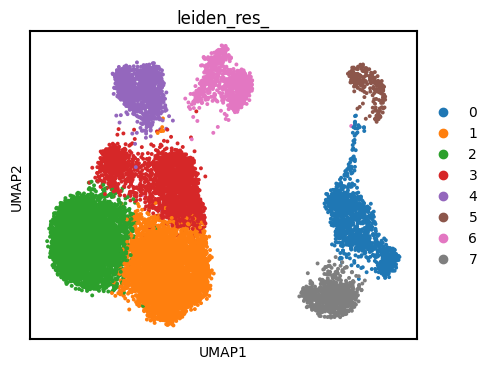

In [47]:
sc.pl.umap(
    bone_adata,
    color=["leiden_res_"],
    size=32,
    ncols = 1
)

In [48]:
#fixing dataset for cell annotation
!wget wget -O result.txt 'http://www.ensembl.org/biomart/martservice?query=<?xml version="1.0" encoding="UTF-8"?><!DOCTYPE Query><Query  virtualSchemaName = "default" formatter = "CSV" header = "0" uniqueRows = "0" count = "" datasetConfigVersion = "0.6" ><Dataset name = "hsapiens_gene_ensembl" interface = "default" ><Attribute name = "ensembl_gene_id" /><Attribute name = "external_gene_name" /></Dataset></Query>'

--2025-12-06 10:28:28--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2025-12-06 10:28:28--  http://www.ensembl.org/biomart/martservice?query=%3C?xml%20version=%221.0%22%20encoding=%22UTF-8%22?%3E%3C!DOCTYPE%20Query%3E%3CQuery%20%20virtualSchemaName%20=%20%22default%22%20formatter%20=%20%22CSV%22%20header%20=%20%220%22%20uniqueRows%20=%20%220%22%20count%20=%20%22%22%20datasetConfigVersion%20=%20%220.6%22%20%3E%3CDataset%20name%20=%20%22hsapiens_gene_ensembl%22%20interface%20=%20%22default%22%20%3E%3CAttribute%20name%20=%20%22ensembl_gene_id%22%20/%3E%3CAttribute%20name%20=%20%22external_gene_name%22%20/%3E%3C/Dataset%3E%3C/Query%3E
Resolving www.ensembl.org (www.ensembl.org)... 193.62.193.83
Connecting to www.ensembl.org (www.ensembl.org)|193.62.193.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘result.txt’

result.txt              [        <=>    

In [49]:
import pandas as pd

ensembl_var = pd.read_csv('result.txt', header = None)

ensembl_var.columns = ['ensembl_gene_id', 'gene_name']

ensembl_var.head(3)

,ensembl_gene_id,gene_name
0,ENSG00000210049,MT-TF
1,ENSG00000211459,MT-RNR1
2,ENSG00000210077,MT-TV


In [50]:
#cell annotation
import decoupler as dc

In [51]:
# Query Omnipath and get PanglaoDB
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep canonical cell type markers alone
#markers = markers[markers["canonical_marker"]]

# Remove duplicated entries
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

#Format because dc only accepts cell_type and genesymbol

markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]


markers.head()

,source,target
,,
0,Hepatocytes,A1CF
1,Germ cells,A2APA5
2,Bergmann glia,A2M
3,Mast cells,A3FIN4
4,Mast cells,A4GALT


In [52]:
#correct target to ensemble
markers = markers.merge(ensembl_var, left_on="target", right_on="gene_name", how="left")
markers = markers.drop(columns=["target"])
# Remove duplicated entries
markers = markers[~markers.duplicated(["source", "ensembl_gene_id"])]

#Format because dc only accepts cell_type and genesymbol
markers = markers.rename(columns={"source": "source", "ensembl_gene_id": "target"})

markers = markers[["source", "target"]]
markers = markers.dropna()

markers.head()

,source,target
0,Hepatocytes,ENSG00000148584
2,Bergmann glia,ENSG00000175899
4,Mast cells,ENSG00000128274
6,Interneurons,ENSG00000115977
7,Neurons,ENSG00000115977


In [54]:
bone_adata.var_names

Index(['ENSG00000161920', 'ENSG00000122335', 'ENSG00000175548',
       'ENSG00000100330', 'ENSG00000176340', 'ENSG00000179846',
       'ENSG00000204860', 'ENSG00000172260', 'ENSG00000141424',
       'ENSG00000164512',
       ...
       'ENSG00000164114', 'ENSG00000151702', 'ENSG00000224578',
       'ENSG00000138756', 'ENSG00000111052', 'ENSG00000176946',
       'ENSG00000150456', 'ENSG00000284934', 'ENSG00000261842',
       'ENSG00000260456'],
      dtype='object', length=17374)

In [56]:
dc.mt.ulm(data=bone_adata,
          net=markers,
          tmin = 3)

In [58]:
score = dc.pp.get_obsm(bone_adata, key="score_ulm")
score

AnnData object with n_obs × n_vars = 14783 × 163
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', '

In [59]:
bone_adata.obsm["score_ulm"].head()

,Acinar cells,Adipocyte progenitor cells,Adipocytes,Adrenergic neurons,Airway goblet cells,Alpha cells,Alveolar macrophages,Anterior pituitary gland cells,Astrocytes,B cells,...,Tanycytes,Taste receptor cells,Thymocytes,Transient cells,Trigeminal neurons,Trophoblast cells,Tuft cells,Undefined placental cells,Urothelial cells,Vascular smooth muscle cells
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.824925,-0.984226,0.465568,-0.593380,-1.028023,0.736968,5.058991,-0.221607,0.141010,1.070172,...,0.510123,0.307417,-0.549988,0.519447,-0.931330,-0.352145,3.136762,-0.785042,-0.785042,-0.513866
Guo-AAACCTGAGAGGTTGC-7,-0.906980,-0.776597,-1.481681,-0.468206,-0.811154,1.447585,-0.096684,0.243915,0.089626,-0.136221,...,0.913387,0.783122,3.848884,-0.965613,-0.433550,-0.965613,-0.193699,-0.619435,-0.619435,-0.405466
Guo-AAACCTGAGATACACA-3,-0.893096,-0.764709,-0.374104,-0.461039,-0.798737,1.464207,-0.085598,-0.893096,1.600218,3.535015,...,0.943138,-0.691663,1.920798,0.168941,0.434417,1.263576,0.827340,-0.609953,-0.609953,-0.399259
Guo-AAACCTGAGCGATTCT-1,-0.922784,-0.790129,-0.495858,-0.476364,-0.825288,0.210146,-0.130702,0.210146,0.731995,3.775464,...,-0.673762,-0.714655,0.891450,-0.982438,0.346655,0.119700,1.675285,-0.630228,-0.630228,-0.412531
Guo-AAACCTGAGTGAAGAG-3,-0.643881,-0.551321,0.028846,-0.332390,-0.575853,-0.643881,0.559366,0.943509,-0.000549,1.969605,...,-0.470127,-0.498659,-0.761985,-0.685504,-0.895651,-0.685504,1.785127,-0.439750,-0.439750,-0.287850


In [60]:
bone_adata.obsm["score_ulm"].columns

Index(['Acinar cells', 'Adipocyte progenitor cells', 'Adipocytes',
       'Adrenergic neurons', 'Airway goblet cells', 'Alpha cells',
       'Alveolar macrophages', 'Anterior pituitary gland cells', 'Astrocytes',
       'B cells',
       ...
       'Tanycytes', 'Taste receptor cells', 'Thymocytes', 'Transient cells',
       'Trigeminal neurons', 'Trophoblast cells', 'Tuft cells',
       'Undefined placental cells', 'Urothelial cells',
       'Vascular smooth muscle cells'],
      dtype='object', length=163)

In [61]:
#rank genes
bone_adata_gene_rank = dc.tl.rankby_group(score, groupby="leiden_res_", reference="rest", method="t-test_overestim_var")
bone_adata_gene_rank = bone_adata_gene_rank[bone_adata_gene_rank["stat"] > 0]
bone_adata_gene_rank.head(5)

,group,reference,name,stat,meanchange,pval,padj
0,0,rest,Neutrophils,106.362350,6.144980,0.0,0.0
1,0,rest,Alveolar macrophages,101.926384,4.800627,0.0,0.0
2,0,rest,Monocytes,96.960966,9.563235,0.0,0.0
3,0,rest,Kupffer cells,86.445917,3.519284,0.0,0.0
4,0,rest,Macrophages,85.964462,5.599022,0.0,0.0


In [62]:
#top cell type per cluster
top_cell_type_per_group = bone_adata_gene_rank.groupby('group')['name'].apply(lambda x: x.head(1))
display(top_cell_type_per_group.to_dict())

/tmp/ipython-input-394770788.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_cell_type_per_group = bone_adata_gene_rank.groupby('group')['name'].apply(lambda x: x.head(1))


{('0', 0): 'Neutrophils',
 ('1', 163): 'Gamma delta T cells',
 ('2', 326): 'T memory cells',
 ('3', 489): 'NK cells',
 ('4', 652): 'B cells naive',
 ('5', 815): 'Platelets',
 ('6', 978): 'Plasma cells',
 ('7', 1141): 'Monocytes'}

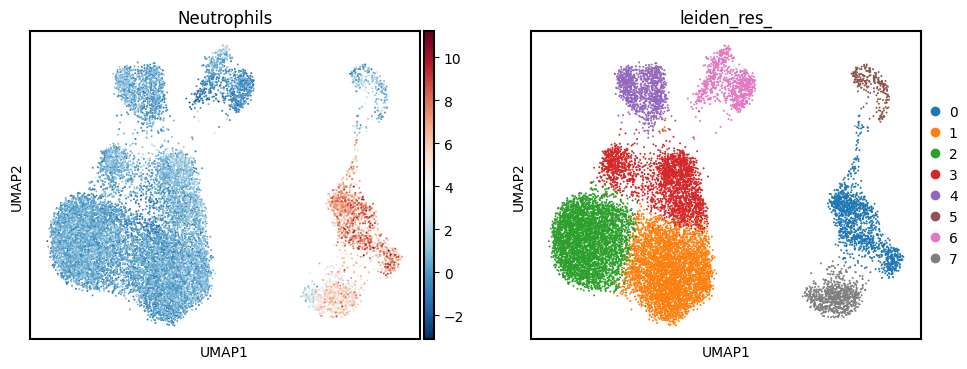

In [63]:
#check the score for one of the cell types, Neutrophils
sc.pl.umap(score, color=["Neutrophils","leiden_res_"], cmap="RdBu_r")

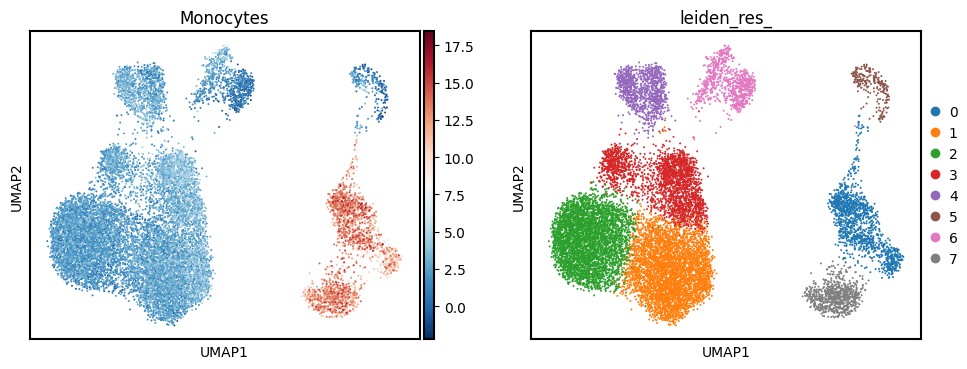

In [64]:
#check the score for one of the cell types, monocyte
sc.pl.umap(score, color=["Monocytes","leiden_res_"], cmap="RdBu_r")

In [65]:
#create a dictionary with cell type
dict_ann = bone_adata_gene_rank[bone_adata_gene_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()
dict_ann

/tmp/ipython-input-3846920107.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dict_ann = bone_adata_gene_rank[bone_adata_gene_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


{'0': 'Neutrophils',
 '1': 'Gamma delta T cells',
 '2': 'T memory cells',
 '3': 'NK cells',
 '4': 'B cells naive',
 '5': 'Platelets',
 '6': 'Plasma cells',
 '7': 'Monocytes'}

In [66]:
bone_adata.obs["leiden_res_"] = bone_adata.obs["leiden_res_"].cat.rename_categories(dict_ann)

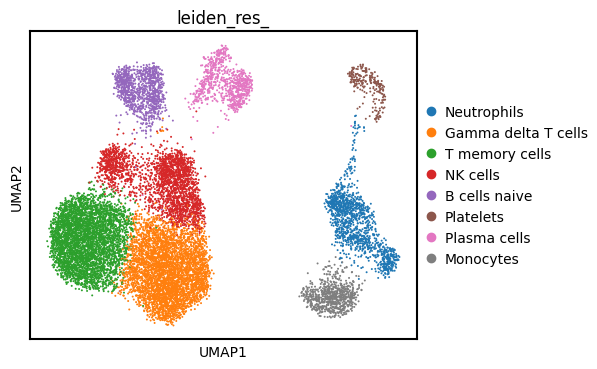

In [67]:
#generate plot of cell type
sc.pl.umap(
    adata=bone_adata,
    color=[ "leiden_res_"],
    ncols=1,
)

In [68]:
#trajectory analysis
sc.tl.draw_graph(bone_adata)

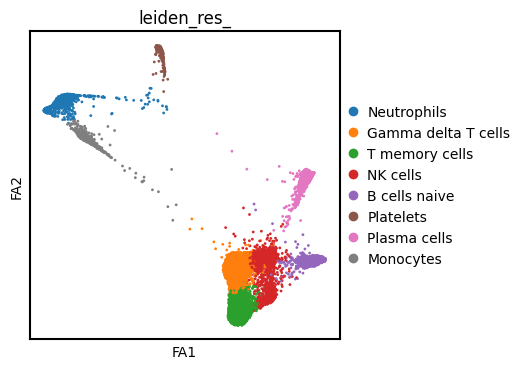

In [69]:
plt.rcParams["figure.figsize"] = (4,4)
sc.pl.draw_graph(bone_adata, color='leiden_res_', size = 16)

In [70]:
sc.tl.paga(bone_adata, groups='leiden_res_')

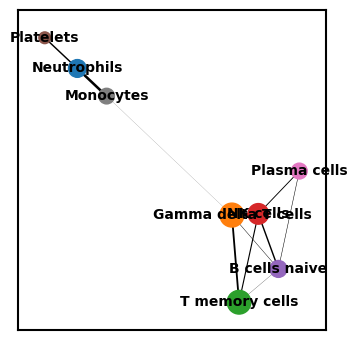

In [71]:
sc.pl.paga(bone_adata, color=['leiden_res_'])

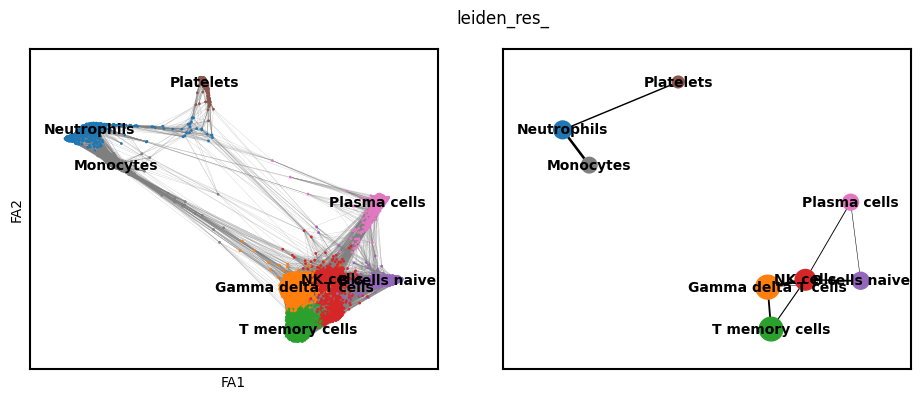

[<Axes: xlabel='FA1', ylabel='FA2'>, <Axes: >]

In [72]:
plt.rcParams["figure.figsize"] = (5,4)
sc.pl.paga_compare(bone_adata, threshold=0.03, frameon=True, edges=True, size = 16)

In [74]:
bone_adata.uns['iroot'] = np.flatnonzero(bone_adata.obs['leiden_res_']  == 'B cells naive')[0]
sc.tl.dpt(bone_adata)

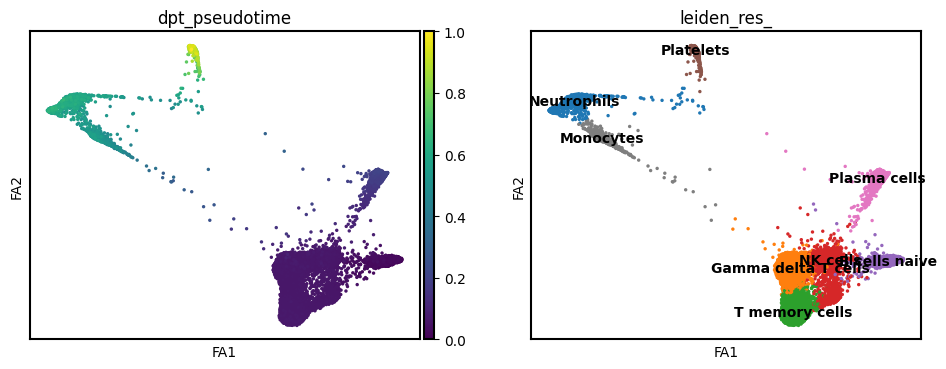

In [75]:
sc.pl.draw_graph(bone_adata, color=['dpt_pseudotime', 'leiden_res_'], legend_loc='on data', size = 24)

In [76]:
bone_adata.write("bone_adata.h5", compression="gzip")

/usr/local/lib/python3.12/dist-packages/anndata/_io/utils.py:243: FutureWarning: Forward slashes will be disallowed in h5 stores in the next minor release
  return func(*args, **kwargs)
